# **Python Code for Performing Spectral Embedding using a Support Vector Machine**

## **This code is provided by the 2024 CCBER Data Science Capstone group.**

In [1]:
# Load in necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import SpectralEmbedding
from sklearn.cluster import KMeans

First, let's see how this method works using the digits dataset from sklearn library. The code below was provided by Dr. Laura Baracaldo Lancheros. 

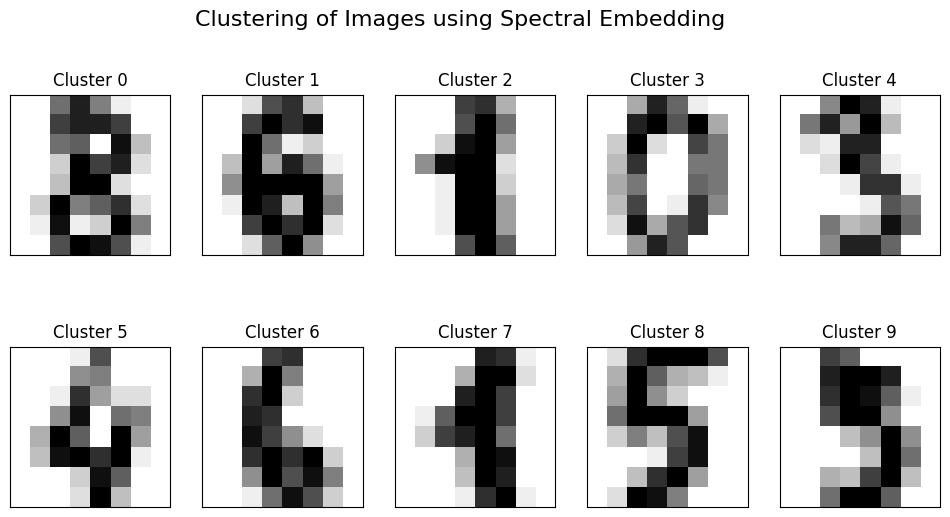

In [2]:
######## Load a dataset of images (I'm using the digits dataset from sklearn library)
digits = load_digits()
data = digits.data
images = digits.images
##### Perform Spectral Embedding (a method related to diffusion maps) to reduce dimensionality
embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors')
dmap = embedding.fit_transform(data)
##### Perform k-means clustering on the reduced-dimensional space
kmeans = KMeans(n_clusters=10, random_state=0).fit(dmap)
labels = kmeans.labels_
# Visualize the clustering results
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[labels == i][0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Cluster {}'.format(i))
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Clustering of Images using Spectral Embedding', fontsize=16)
plt.show()

Accuracy: 0.9777777777777777


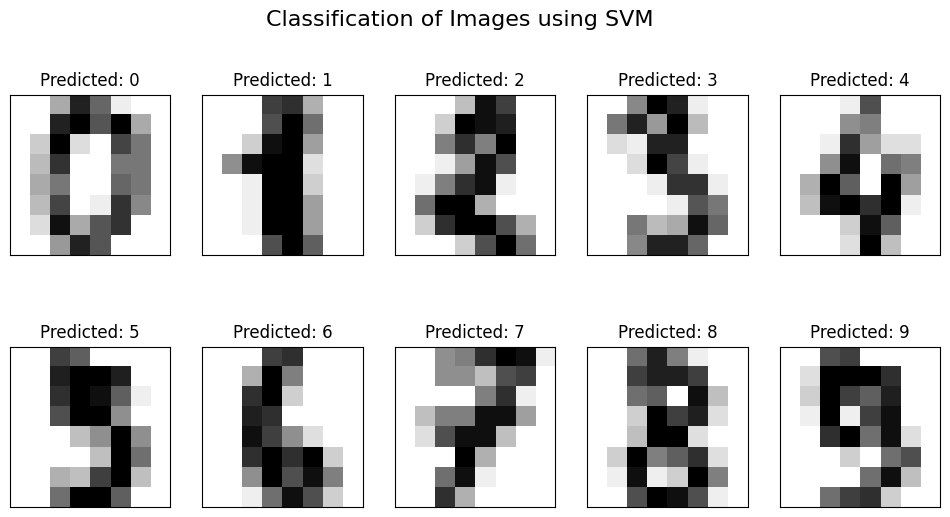

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load a dataset of labeled images
digits = load_digits()
data = digits.data
target = digits.target
images = digits.images

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Train a classifier (for example, Support Vector Machine)
classifier = SVC(kernel='linear', C=1.0, random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the classifier
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Visualize some predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    predicted_label = classifier.predict([data[i]])[0]
    plt.title('Predicted: {}'.format(predicted_label))
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Classification of Images using SVM', fontsize=16)
plt.show()


Now, let's try to apply this to our more complex images. I am importing the 'tqdm' package so when the code runs, we see visually that it is looping through each image file in the folders. Furthermore, I am only training and testing this model on 16 of the provided species.

In [ ]:
import os
import random
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt
from tqdm import tqdm

Processing Agapostemon Texanus:   0%|                           | 0/5 [00:00<?, ?it/s]
                                                                                      
Processing Megachile onobrychidis-isolated:   0%|               | 0/3 [00:00<?, ?it/s]
                                                                                      
Processing Osmia-Aglaia-Isolated:   0%|                         | 0/3 [00:00<?, ?it/s]
                                                                                      
Processing folders: 100%|█████████████████████████████| 16/16 [00:26<00:00,  1.68s/it]


Accuracy: 0.5357142857142857


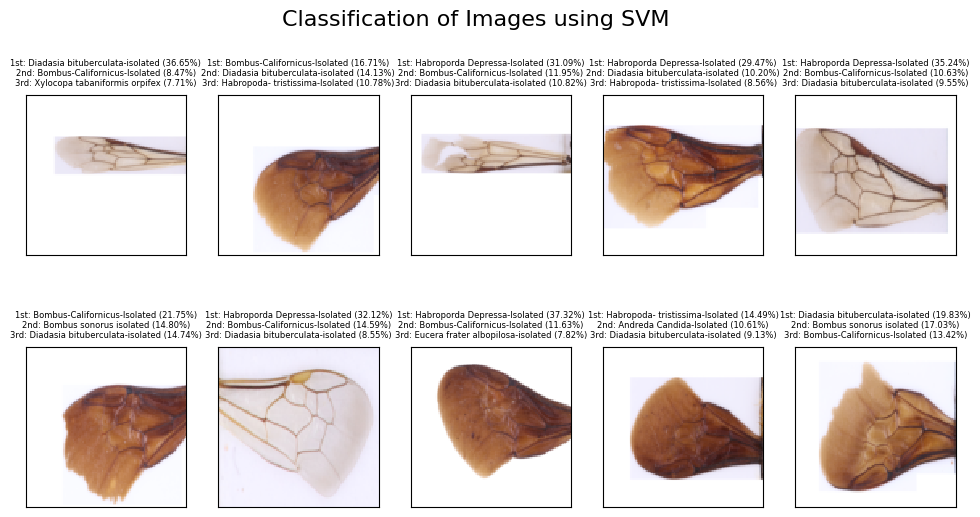

In [47]:
# Define a fixed size for resizing the images
image_size = (100, 100)  # Adjust as needed

# Initialize empty lists to store the resized image arrays and corresponding species identifiers
image_arrays = []
species_identifiers = []

# Define the path to the main folder
main_folder = "C:/Users/jenni/Downloads/BEEWINGCROPPED"


if not os.path.exists(main_folder):
    print(f"The path {main_folder} does not exist.")
else:
    # loop through each folder in the main folder
    for species_folder in tqdm(os.listdir(main_folder), desc="Processing folders"):
        species_folder_path = os.path.join(main_folder, species_folder)
        if os.path.isdir(species_folder_path):
            for image_file in tqdm(os.listdir(species_folder_path), desc=f"Processing {species_folder}", leave=False):
                # Skip files starting with '.'
                if not image_file.startswith('.'):
                    image_path = os.path.join(species_folder_path, image_file)
                    try:
                        with Image.open(image_path) as img:
                            # Ensure the image is in RGB mode
                            img = img.convert('RGB')
                            # Resize the image
                            img = img.resize(image_size, Image.BILINEAR)
                            # Convert to numpy array
                            image_array = np.array(img)
                            # Append the image array and species identifier to the lists
                            image_arrays.append(image_array)
                            species_identifiers.append(species_folder)
                    except Exception as e:
                        print(f"Error processing {image_path}: {e}")

    # ensure/resize all images so that they are the same shape before flattening

    image_arrays = [img for img in image_arrays if img.shape == (image_size[0], image_size[1], 3)]
    species_identifiers = [species_identifiers[i] for i in range(len(species_identifiers)) if image_arrays[i].shape == (image_size[0], image_size[1], 3)]
    
    if len(image_arrays) != len(species_identifiers):
        raise ValueError("Mismatch between number of valid images and species identifiers")

    # Create a DataFrame from the lists
    df = pd.DataFrame({'image_array': image_arrays, 'species_identifier': species_identifiers})

    # Flatten the image arrays
    # This transformation is necessary because most machine learning algorithms, including SVMs, operate on flat feature vectors rather than structured data like images. 
    # Flattening effectively "unrolls" the image pixels into a single vector, where each element represents the intensity value of a pixel.
    X = np.array([arr.flatten() for arr in df['image_array']])
    y = df['species_identifier']

    # Perform spectral embedding to extract features
    spectral_embedding = SpectralEmbedding(n_components=8, n_neighbors=10, random_state=42)
    X_embedding = spectral_embedding.fit_transform(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_embedding, y, test_size=0.2, random_state=42)

    # Train a classifier (for example, Support Vector Machine)
    classifier = SVC(kernel='rbf', C=4.0, random_state=42, probability=True)
    classifier.fit(X_train, y_train)

    # Evaluate the classifier
    accuracy = classifier.score(X_test, y_test)
    print("Accuracy:", accuracy)

    # Visualize some random predictions
    plt.figure(figsize=(12, 6))
    random_indices = random.sample(range(len(X_test)), 10)
    for i, idx in enumerate(random_indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(df['image_array'].iloc[idx], interpolation='nearest')  # Use original color image
        predicted_probabilities = classifier.predict_proba([X_test[idx]])[0]
        top_three_indices = np.argsort(predicted_probabilities)[::-1][:3]
        top_three_species = [classifier.classes_[index] for index in top_three_indices]
        top_three_probs = [predicted_probabilities[index] for index in top_three_indices]
        plt.title('1st: {} ({:.2f}%)\n2nd: {} ({:.2f}%)\n3rd: {} ({:.2f}%)'.format(
            top_three_species[0], top_three_probs[0] * 100,
            top_three_species[1], top_three_probs[1] * 100,
            top_three_species[2], top_three_probs[2] * 100), fontsize=6)  # Set smaller font size for titles
        plt.xticks(())
        plt.yticks(())
    plt.suptitle('Classification of Images using SVM', fontsize=16)
    plt.show()


We can see that our classification is not very effective with only an accuracy of about 0.54. Fine tuning the Support Vector Machine could present more accurate results. Below are descriptions of each parameter that can be altered.riance.



**1. Kernel Type:**
kernel='poly': Polynomial kernel with parameters like degree and coef0.
<br>
kernel='rbf': Radial basis function (RBF) kernel with parameter gamma.
<br> 
kernel='sigmoid': Sigmoid kernel with parameters gamma and coef0.

**2. Regularization Parameter (C):**
<br> 
Adjust the regularization parameter C to control the trade-off between maximizing the margin and minimizing the classification error. 
<br>
Higher values of C penalize misclassification more severely, which can lead to overfitting. Conversely, lower values of C encourage a wider margin but may increase bias.

 **3. Gamma Parameter (RBF Kernel):**
If using an RBF kernel like we did initially, tune the gamma parameter, which determines the influence of each training example. Higher values of gamma lead to more complex decision boundaries, potentially causing overfitting. Lower values of gamma result in smoother decision boundaries, which may improve generalization.

Below, we ran the same model on all of the uncropped ARuCO marker images and the accuracy is extremely low. So we can conclude that spectral embedding does not provide the necessary computational power to preserve the complex structures in bee wings and output a strong classification accuracy. In the code below, the model is trained on 52 different species that correspond to a multitude of genera, so the dimensionality reduction technique may not be able to distinguish between species that share similar structures. 

Processing folders: 100%|█████████████████████████████| 52/52 [00:51<00:00,  1.01it/s]


Accuracy: 0.16216216216216217


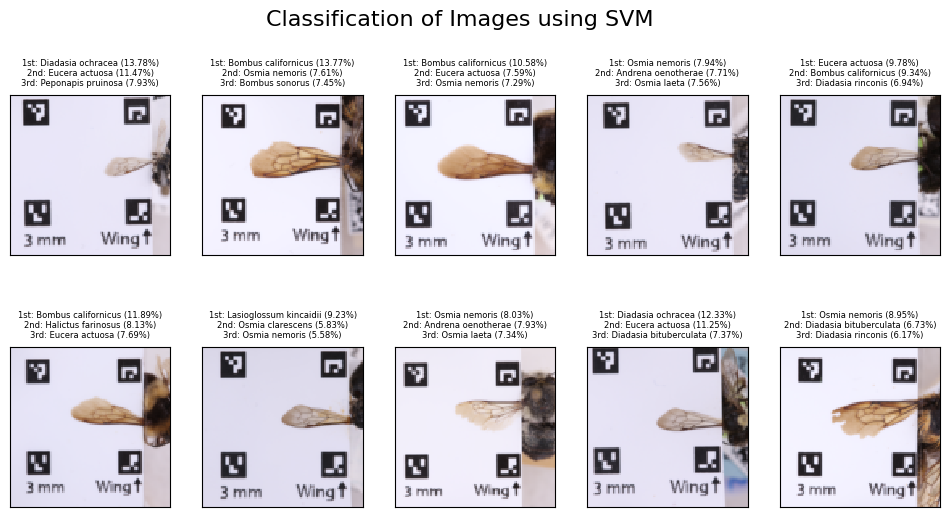

In [54]:
# Define a fixed size for resizing the images
image_size = (100, 100)  # Adjust as needed

# Initialize empty lists to store the resized image arrays and corresponding species identifiers
image_arrays = []
species_identifiers = []

# Define the path to the main folder
main_folder = "C:/Users/jenni/Downloads/Bee Wing Photos"


if not os.path.exists(main_folder):
    print(f"The path {main_folder} does not exist.")
else:
    # loop through each folder in the main folder
    for species_folder in tqdm(os.listdir(main_folder), desc="Processing folders"):
        species_folder_path = os.path.join(main_folder, species_folder)
        if os.path.isdir(species_folder_path):
            for image_file in tqdm(os.listdir(species_folder_path), desc=f"Processing {species_folder}", leave=False):
                # Skip files starting with '.'
                if not image_file.startswith('.'):
                    image_path = os.path.join(species_folder_path, image_file)
                    try:
                        with Image.open(image_path) as img:
                            # Ensure the image is in RGB mode
                            img = img.convert('RGB')
                            # Resize the image
                            img = img.resize(image_size, Image.BILINEAR)
                            # Convert to numpy array
                            image_array = np.array(img)
                            # Append the image array and species identifier to the lists
                            image_arrays.append(image_array)
                            species_identifiers.append(species_folder)
                    except Exception as e:
                        print(f"Error processing {image_path}: {e}")

    # ensure/resize all images so that they are the same shape before flattening

    image_arrays = [img for img in image_arrays if img.shape == (image_size[0], image_size[1], 3)]
    species_identifiers = [species_identifiers[i] for i in range(len(species_identifiers)) if image_arrays[i].shape == (image_size[0], image_size[1], 3)]
    
    if len(image_arrays) != len(species_identifiers):
        raise ValueError("Mismatch between number of valid images and species identifiers")

    # Create a DataFrame from the lists
    df = pd.DataFrame({'image_array': image_arrays, 'species_identifier': species_identifiers})

    # Flatten the image arrays
    # This transformation is necessary because most machine learning algorithms, including SVMs, operate on flat feature vectors rather than structured data like images. 
    # Flattening effectively "unrolls" the image pixels into a single vector, where each element represents the intensity value of a pixel.
    X = np.array([arr.flatten() for arr in df['image_array']])
    y = df['species_identifier']

    # Perform spectral embedding to extract features
    spectral_embedding = SpectralEmbedding(n_components=8, n_neighbors=10, random_state=42)
    X_embedding = spectral_embedding.fit_transform(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_embedding, y, test_size=0.2, random_state=42)

    # Train a classifier (for example, Support Vector Machine)
    classifier = SVC(kernel='rbf', C=4.0, random_state=42, probability=True)
    classifier.fit(X_train, y_train)

    # Evaluate the classifier
    accuracy = classifier.score(X_test, y_test)
    print("Accuracy:", accuracy)

    # Visualize some random predictions
    plt.figure(figsize=(12, 6))
    random_indices = random.sample(range(len(X_test)), 10)
    for i, idx in enumerate(random_indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(df['image_array'].iloc[idx], interpolation='nearest')  # Use original color image
        predicted_probabilities = classifier.predict_proba([X_test[idx]])[0]
        top_three_indices = np.argsort(predicted_probabilities)[::-1][:3]
        top_three_species = [classifier.classes_[index] for index in top_three_indices]
        top_three_probs = [predicted_probabilities[index] for index in top_three_indices]
        plt.title('1st: {} ({:.2f}%)\n2nd: {} ({:.2f}%)\n3rd: {} ({:.2f}%)'.format(
            top_three_species[0], top_three_probs[0] * 100,
            top_three_species[1], top_three_probs[1] * 100,
            top_three_species[2], top_three_probs[2] * 100), fontsize=6)  # Set smaller font size for titles
        plt.xticks(())
        plt.yticks(())
    plt.suptitle('Classification of Images using SVM', fontsize=16)
    plt.show()
